In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/covid19-dataset-brasil-io_cleaned.csv')

In [3]:
state_list = data[data['date'] == '2021-03-11'].state.to_list()

In [4]:
state_list

['AC',
 'AL',
 'AM',
 'AP',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PI',
 'PR',
 'RJ',
 'RN',
 'RO',
 'RR',
 'RS',
 'SC',
 'SE',
 'SP',
 'TO']

In [5]:
today = data[data['date'] == '2021-03-11'].new_cases.to_list()

In [6]:
yesterday = data[data['date'] == '2021-03-10'].new_cases.to_list()

In [7]:
cstate = [today[state] > yesterday[state] for state in range(len(today))]

In [8]:
cstate

[False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False]

In [10]:
today

[273,
 726,
 1240,
 421,
 4975,
 5457,
 1858,
 1882,
 4322,
 838,
 7745,
 0,
 2104,
 1728,
 1483,
 1669,
 1409,
 4330,
 2094,
 0,
 1613,
 0,
 6847,
 5501,
 252,
 14505,
 0]

In [ ]:
for value in range(len(today)):
    

In [11]:
norm_today = [((today[value] - min(today)) / (max(today) - min(today))) for value in range(len(today))]

In [12]:
norm_today

[0.018821096173733197,
 0.050051706308169595,
 0.08548776284039986,
 0.029024474319200275,
 0.34298517752499136,
 0.3762150982419855,
 0.12809376077214754,
 0.12974836263357464,
 0.2979662185453292,
 0.05777318166149604,
 0.5339538090313685,
 0.0,
 0.14505342985177525,
 0.11913133402275078,
 0.10224060668734919,
 0.11506377111340917,
 0.09713891761461566,
 0.29851775249913826,
 0.14436401240951396,
 0.0,
 0.11120303343674595,
 0.0,
 0.47204412271630475,
 0.3792485349879352,
 0.01737331954498449,
 1.0,
 0.0]

In [13]:
## Defining the style for plottings

plt.style.use("seaborn-whitegrid")

## Global customizations for plotting

# Figure

plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 600

# Axes

plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.labelweight'] = 600
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.xmargin'] = 0.05
plt.rcParams['axes.titleweight'] = 600
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'

# Ticks

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Grid

plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.4

# Minor

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['lines.linewidth'] = 2

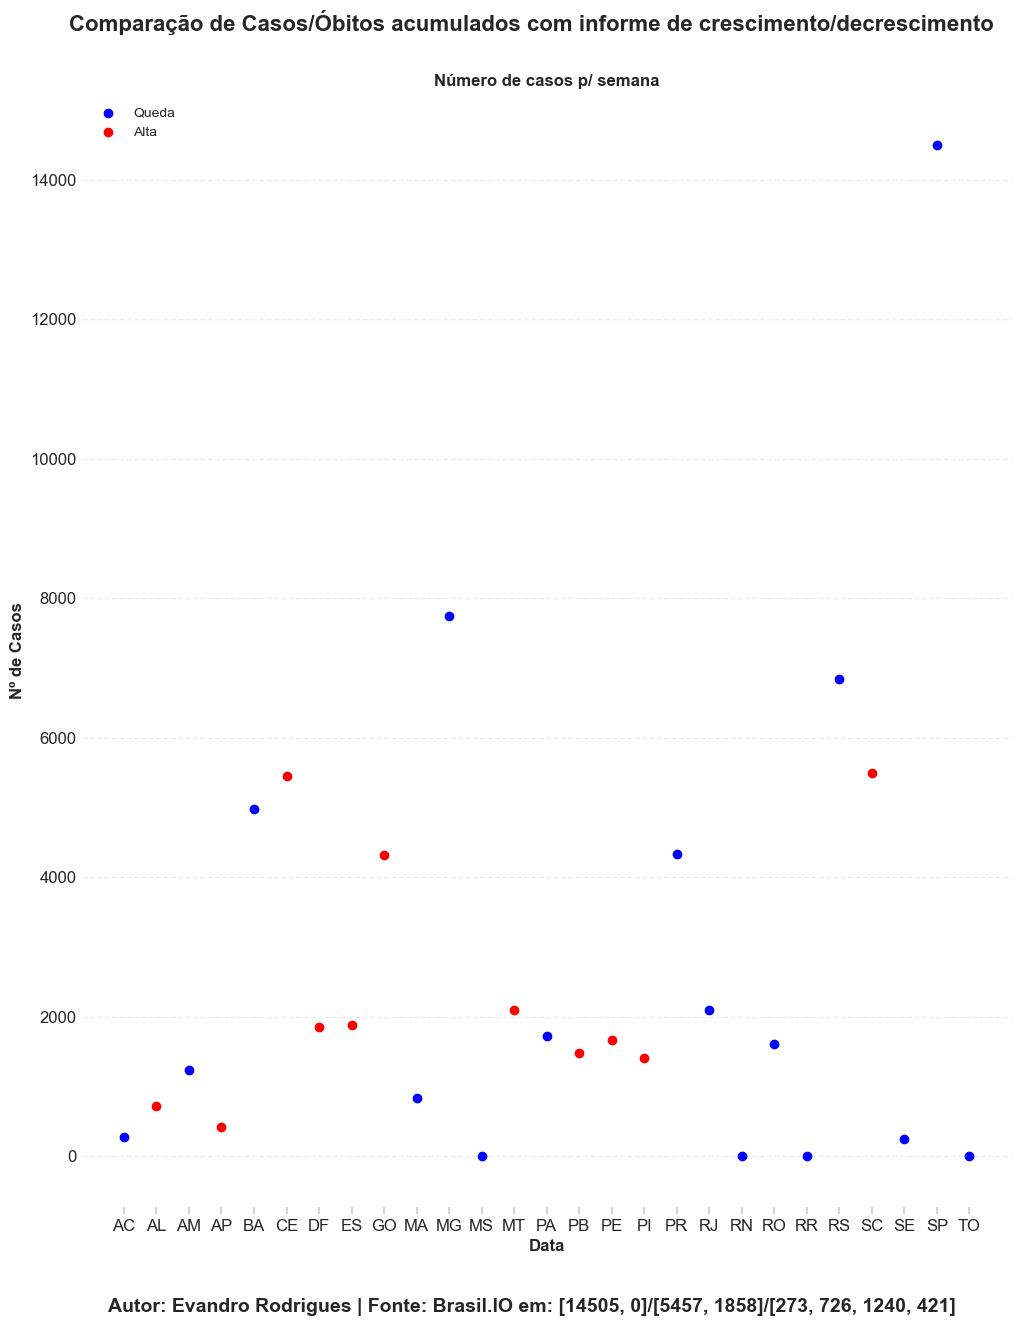

In [34]:
# Creating the figure
fig, axs = plt.subplots(figsize=(12, 14), dpi=100)

# Customizing the figure
fig.subplots_adjust(top=0.92)
fig.suptitle("Comparação de Casos/Óbitos acumulados com informe de crescimento/decrescimento")
fig.text(.5, .05, "Autor: Evandro Rodrigues | Fonte: Brasil.IO em: %s/%s/%s" % (today[-2:], today[5:7], today[0:4]), ha='center', fontsize="14", fontweight=600)

# Adding data to the axis (accumulated cases/deaths)
for state in range(len(state_list)):
    axs.scatter(x=state_list[state], y=today[state], color=('red' if cstate[state] == True else 'blue'), label=('Alta' if cstate[state] == True else 'Queda'))
    
# Customizing axis
axs.set_title("Número de casos p/ semana")
axs.set_xlabel("Data")
axs.set_ylabel("Nº de Casos")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", )
axs.tick_params(axis='x', which='both', length=5, width=1.5, color='lightgray')

In [65]:
temp = pd.read_csv('../data/caso_full.csv')

In [66]:
temp = temp[temp['place_type'] == 'state']

In [68]:
temp = temp[temp['is_last'] == True]

In [71]:
temp

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
7317,NaN,12.0,2021-03-08,202110,894470.0,881935.0,True,False,60656,6781.22240,2021-03-08,0.0176,1066,357,state,AC,368,3
39501,NaN,27.0,2021-03-08,202110,3351543.0,3337357.0,True,False,136107,4061.02503,2021-03-08,0.0228,3102,366,state,AL,541,15
59929,NaN,13.0,2021-03-08,202110,4207714.0,4144597.0,True,False,324564,7713.54707,2021-03-08,0.0348,11288,361,state,AM,461,26
65462,NaN,16.0,2021-03-08,202110,861773.0,845731.0,True,False,85879,9965.38532,2021-03-08,0.0135,1161,354,state,AP,301,5
192324,NaN,29.0,2021-03-08,202110,14930634.0,14873064.0,True,False,715418,4791.61166,2021-03-08,0.0177,12632,368,state,BA,1413,102
252634,NaN,23.0,2021-03-08,202110,9187103.0,9132078.0,True,False,448542,4882.30076,2021-03-08,0.0263,11801,358,state,CE,1929,81
253716,NaN,53.0,2021-03-08,202110,3055149.0,3015268.0,True,False,308539,10098.98372,2021-03-08,0.0161,4979,367,state,DF,2288,17
279950,NaN,32.0,2021-03-08,202110,4064052.0,4018650.0,True,False,336218,8272.97485,2021-03-08,0.0196,6576,369,state,ES,1331,24
351747,NaN,52.0,2021-03-08,202110,7113540.0,7018354.0,True,False,416763,5858.72857,2021-03-08,0.0216,9012,362,state,GO,3574,76
419623,NaN,21.0,2021-03-08,202110,7114598.0,7075181.0,True,False,223822,3145.95428,2021-03-08,0.0237,5309,354,state,MA,333,34


In [70]:
temp.new_deaths.sum()

1116

In [78]:
alsotemp = pd.read_csv('../data/covid19-dataset-brasil-io_cleaned.csv')

In [79]:
alsotemp = alsotemp.sort_values(by='date').reset_index(drop=True)

In [81]:
alsotemp.to_csv('test.csv',index=False)

In [1]:
regions = {
    "Norte" : ["AC", "AP", "AM", "TO", "PA", "RR", "RO"],
    "Nordeste" : ["AL", "BA", "PB", "PE", "SE", "PI", "CE", "MA", "RN"],
    "Centro-Oeste" : ["MT", "GO", "MS", "DF"],
    "Sudeste" : ["SP", "ES", "RJ", "MG"],
    "Sul" : ["SC", "RS", "PR"],
}

In [5]:
import itertools

In [7]:
flatten = itertools.chain.from_iterable

In [8]:
list(flatten(regions.values()))

['AC',
 'AP',
 'AM',
 'TO',
 'PA',
 'RR',
 'RO',
 'AL',
 'BA',
 'PB',
 'PE',
 'SE',
 'PI',
 'CE',
 'MA',
 'RN',
 'MT',
 'GO',
 'MS',
 'DF',
 'SP',
 'ES',
 'RJ',
 'MG',
 'SC',
 'RS',
 'PR']

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../../data/processed/covid19-dataset-brasilio_cleaned.csv')

In [4]:
data = data[data['state'] == 'CE']

In [14]:
data[data['date'] == '2020-03-16'].epidemiological_week.values[0]

202012